## Examining the effects of Mass Loss on the Evolution of Wolf-Rayet Stars using the SYGMA module

#### SYGMA module: http://nugrid.github.io/NuPyCEE
#### SYGMA and OMEGA documentation available at: https://nugrid.github.io/NuPyCEE/SPHINX/build/html/sygma.html & on GitHub

Yield tables & W-R mass-loss prescription taken from:

[1] Limongi, M.,Chieffi, A.,2018,Presupernova evolution and explosive nucleosynthesis of rotating massive stars in the metallicity range -3 ≤ [Fe/H] ≤ 0, Ap. JS.

Sigma module & code for creating yield tables and extracting/subtracting values from runs generously provided by Benoit Côté:

[2]
Ritter C.,Côté B., Herwig F.,Navarro J.F.,Fryer
C.L.,2017,SYGMA (Stellar Yields for Galactic Modeling Applica- tions), The Astrophysical Journal Supplement Series, Volume 237, Issue 2, article id. 42, 14 pp.


In [1]:
from NuPyCEE import sygma as s
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from pylab import * 
import numpy as np
import copy
import re
import os

## Effects of Metallicity

### Non-rotating (vini=0km/s) stars with masses 20-120 $M_{☉}$ at solar metallicity 


SYGMA run in progress..
   SYGMA run completed - Run time: 0.04s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.06s


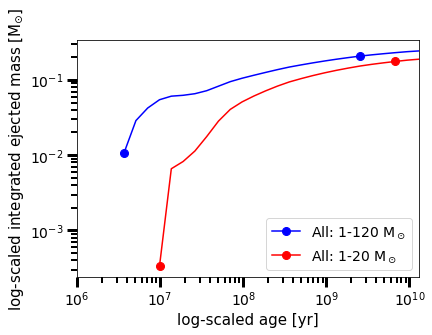

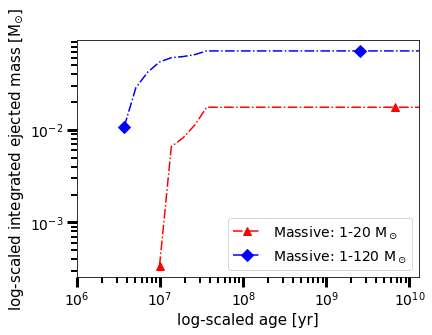

In [5]:
# First examine the yields for non-rotating SSP of 20-120 M_solar at Z = 0.02#
# Run sigma module with range 1-120 and 1-20 for subtraction purposes #

s1_Z2 = s.sygma(iniZ=0.02,mgal=1.0,transitionmass=8,sn1a_on=False,
                table='yield_tables/WR/agb_and_massive_stars_Z_^-2C15_LC18_R_000_winds (1).txt',
                imf_bdys=[0.1,121],imf_type='salpeter',
                imf_yields_range=[1,20]) #1-20

s2_Z2 = s.sygma(iniZ=0.02, mgal=1.0,transitionmass=8,sn1a_on=False,
                table='yield_tables/WR/agb_and_massive_stars_Z_^-2C15_LC18_R_000_winds (1).txt',
                imf_bdys=[0.1,121],imf_type='salpeter',imf_yields_range=[1,120])

# Plot the two runs#

## SOURCE: CONTRIBUTION DUE TO MASSIVE, AGB, SN
s2_Z2.plot_totmasses(fig=1,source='all',color='b',label='All: 1-120 M$_\odot$')
s1_Z2.plot_totmasses(fig=1,source='all',color='r',label='All: 1-20 M$_\odot$')
plt.legend(loc='best')

## SOURCE: MASSIVE ONLY
s1_Z2.plot_totmasses(fig=2,source='massive',color='r',marker='^',label='Massive: 1-20 M$_\odot$')
s2_Z2.plot_totmasses(fig=2,source='massive',color='b',label='Massive: 1-120 M$_\odot$')
plt.legend(loc='best')

(0, 0.02)

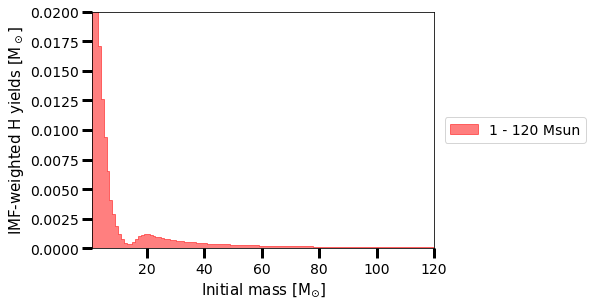

In [10]:
# Contribution by element per stellar mass

elem = "H"
s2_Z2.plot_mass_range_contributions( specie=elem, color="r", label="1 - 120 Msun")
plt.ylabel("IMF-weighted "+elem+" yields [M$_\odot$]")
plt.xlim(1,120)
plt.ylim(0,0.02)

(0, 0.02)

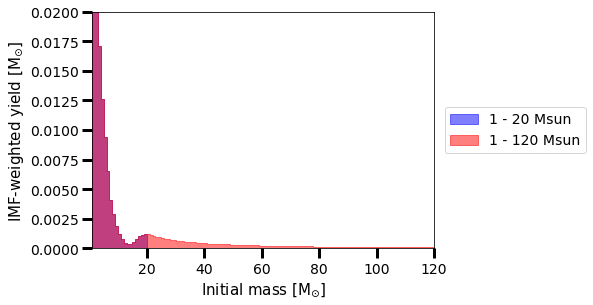

In [12]:
elem = "H"
s1_Z2.plot_mass_range_contributions(specie=elem, color="b", label="1 - 20 Msun")#*10**-4
s2_Z2.plot_mass_range_contributions( specie=elem, color="r", label="1 - 120 Msun")#*10**-4
#plt.ylabel("IMF-weighted "+elem+" yields [M$_\odot$]")
plt.xlim(1,120)
plt.ylim(0,0.02)

In [13]:
# Function to get the cumulated mass ejected by massive stars as a function of time
# NO NEED TO CHANGE ANYTHING HERE
def get_massive_star_ejecta(s_inst, element="all"):
    '''
    Function to get the mass ejected by massive stars as a function of time.
    
    s_inst: SYGMA instance
    specie: If "all", this will return the total ejecta
            If e.g., "C", this will return the specific element C
    '''
    
    # Copy the ejecta array (contribution from massive stars only)
    ymgal = copy.deepcopy(s_inst.ymgal_massive)
    
    # Find all isotope indexes that represent the targeted element
    iso_list = []
    if not element == "all":
        for i_iso in range(s_inst.nb_isotopes):
            if s_inst.history.isotopes[i_iso].split("-")[0] == element:
                iso_list.append(i_iso)
                
    # Declare the ejecta array (each array index represents one timestep)
    ejecta = np.zeros(s_inst.nb_timesteps+1)

    # For each time step ..
    for i_step in range(s_inst.nb_timesteps+1):
        
        # If we want the total ejecta ..
        if element == "all":
            
            # Sum all isotopes
            ejecta[i_step] = sum(ymgal[i_step])
            
        # If we want a specific element
        else:
            
            # For each isotope of that element ..
            for i_iso in iso_list:
                
                # Add the isotopic yields to the sum
                ejecta[i_step] += ymgal[i_step][i_iso]
        
    # Return the ejecta array
    return ejecta

In [14]:
# Substract ejecta arrays, for the total ejecta
tot_ej_s_1_120 = get_massive_star_ejecta(s2_Z2, element="all")
tot_ej_s_1_20 = get_massive_star_ejecta(s1_Z2, element="all")

diff_tot_ej = tot_ej_s_1_120 - tot_ej_s_1_20
## ========================================== ##
element = "O"
el_ej_s_1_120 = get_massive_star_ejecta(s2_Z2, element=element)
el_ej_s_1_20 = get_massive_star_ejecta (s1_Z2,  element=element)

diff_el_ej = el_ej_s_1_120 - el_ej_s_1_20
print(tot_ej_s_1_120)

[0.         0.         0.         0.         0.         0.01080672
 0.02878082 0.04228308 0.05445541 0.06071313 0.0623456  0.06545929
 0.07175543 0.07175543 0.07175543 0.07175543 0.07175543 0.07175543
 0.07175543 0.07175543 0.07175543 0.07175543 0.07175543 0.07175543
 0.07175543 0.07175543 0.07175543 0.07175543 0.07175543 0.07175543
 0.07175543]


At t= 9840582.55686354 Mass ejected is 0.05411794756466432


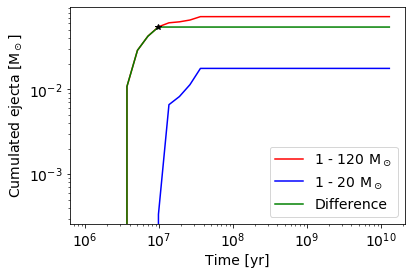

In [15]:
# Copy the time array
time_1_120 = copy.deepcopy(s1_Z2.history.age)
time_1_20 = copy.deepcopy(s1_Z2.history.age)

# Plot total (cumulated) ejecta as a function of time
plt.plot(time_1_120, tot_ej_s_1_120, color="r", label="1 - 120 M$_\odot$")
plt.plot(time_1_20, tot_ej_s_1_20, color="b", label="1 - 20 M$_\odot$")
plt.plot(time_1_20, diff_tot_ej, color="g", label="Difference")
plt.plot(time_1_20[8],diff_tot_ej[8],'k*')

# Labels
#plt.figure(figsize=(8,8))
plt.xlabel("Time [yr]")
plt.ylabel("Cumulated ejecta [M$_\odot$]")
plt.yscale("log")
plt.xscale("log")
plt.legend(loc="best")

print('At t=',time_1_20[8],'Mass ejected is',diff_tot_ej[8])

At t= 9840582.55686354 Mass ejected is 0.00020919493521892336


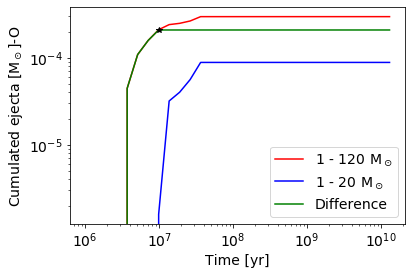

In [16]:
plt.plot(time_1_120, el_ej_s_1_120, color="r", label="1 - 120 M$_\odot$")
plt.plot(time_1_20, el_ej_s_1_20, color="b", label="1 - 20 M$_\odot$")
plt.plot(time_1_20, diff_el_ej, color="g", label="Difference")
plt.plot(time_1_20[8],diff_el_ej[8],'k*')

plt.xlabel("Time [yr]")
plt.ylabel("Cumulated ejecta [M$_\odot$]-" + element)
plt.yscale("log")
plt.xscale("log")
plt.legend(loc="best")
print('At t=',time_1_20[8],'Mass ejected is',diff_el_ej[8])

In [19]:
## ====== H-1 ======= ##
#print(len(s2_Z2.mdot_massive[4:12]))
print('Time step durataion in years',s2_Z2.history.age)
print(s2_Z2.mdot_massive[4][0]) #TIME STEP 4 (2 664 282 years) only H-1
print('First time step duration:',s2_Z2.history.age[1])

Time step durataion in years [0.00000000e+00 1.00000000e+06 1.38630923e+06 1.92185329e+06
 2.66428296e+06 3.69352006e+06 5.12036096e+06 7.09840368e+06
 9.84058256e+06 1.36420905e+07 1.89121559e+07 2.62180964e+07
 3.63463891e+07 5.03873348e+07 6.98524274e+07 9.68370651e+07
 1.34246117e+08 1.86106632e+08 2.58001342e+08 3.57669643e+08
 4.95840728e+08 6.87388579e+08 9.52933133e+08 1.32106000e+09
 1.83139768e+09 2.53888351e+09 3.51967765e+09 4.87936162e+09
 6.76430406e+09 9.37741717e+09 1.30000000e+10]
0.004559658561724023
First time step duration: 1000000.0


In [24]:
for item in s2_Z2.history.age:
    print(np.where(item>0),item)

print('Time step durataion in years',s2_Z2.history.age[4])
print(s2_Z2.mdot_massive[4][0]) #TIME STEP 4 (2 664 282 years) only H-1
print(s2_Z2.mdot_massive[4][0]/s2_Z2.history.age[4]) 

(array([], dtype=int64),) 0.0
(array([0]),) 1000000.0
(array([0]),) 1386309.23265203
(array([0]),) 1921853.28853626
(array([0]),) 2664282.9577004826
(array([0]),) 3693520.062657637
(array([0]),) 5120360.963847775
(array([0]),) 7098403.678693232
(array([0]),) 9840582.55686354
(array([0]),) 13642090.453254446
(array([0]),) 18912155.948020753
(array([0]),) 26218096.400096174
(array([0]),) 36346389.10201427
(array([0]),) 50387334.78568551
(array([0]),) 69852427.42212461
(array([0]),) 96837065.05844718
(array([0]),) 134246117.3534506
(array([0]),) 186106631.9347761
(array([0]),) 258001342.1089537
(array([0]),) 357669642.6022568
(array([0]),) 495840727.77886134
(array([0]),) 687388578.844736
(array([0]),) 952933133.2720133
(array([0]),) 1321060000.755022
(array([0]),) 1831397675.9339883
(array([0]),) 2538883506.804753
(array([0]),) 3519677646.111385
(array([0]),) 4879361616.763186
(array([0]),) 6764304058.766727
(array([0]),) 9377417169.133932
(array([0]),) 13000000000.000006
Time step durat

In [26]:
for item in s2_Z2.history.age:
    if item>0:
        x = item
        
elem = s2_Z2.history.isotopes[0:len(s2_Z2.history.isotopes)]

# starting with time step 4 for ejecta

def M_dot(i):
   
    # Mass loss rates for H
    # Divide mass ejected at time interval i:i+1 and divide by time at interval i
    
    n=range(4,12,1)
    iso = range(0,len(s2_Z2.history.isotopes),1)
    j=0
    i = 3 
    while i <= 12:
        Mdot=np.array([])
        Mdot = s2_Z2.mdot_massive[i:i+1]/s2_Z2.history.age[i]
        i +=1
        r = Mdot[0][0] # Time step
        print('I=',i,r)

In [27]:
M_dot(1)

I= 4 0.0
I= 5 1.7114017670478291e-09
I= 6 2.401151005465566e-09
I= 7 1.5446984090825204e-09
I= 8 1.098188133787935e-09
I= 9 4.3858123722962307e-10
I= 10 8.396780312320726e-11
I= 11 1.1581440839943825e-10
I= 12 1.689282528385274e-10
I= 13 0.0


In [36]:
# Check values from loop

r1=s2_Z2.mdot_massive[4:5]/s2_Z2.history.age[4] # Mass in given interval / time step
r2=s2_Z2.mdot_massive[5:6]/s2_Z2.history.age[5]
r3=s2_Z2.mdot_massive[6:7]/s2_Z2.history.age[6]
r4=s2_Z2.mdot_massive[7:8]/s2_Z2.history.age[7]
r5=s2_Z2.mdot_massive[8:9]/s2_Z2.history.age[8]
r6=s2_Z2.mdot_massive[9:10]/s2_Z2.history.age[9]
r7=s2_Z2.mdot_massive[10:11]/s2_Z2.history.age[10]
r8=s2_Z2.mdot_massive[11:12]/s2_Z2.history.age[11]
r9=s2_Z2.mdot_massive[12:13]/s2_Z2.history.age[12]

# concatenate these arrays for whatever species, and plot vs time
print(r1[0][0],'H-1') #<- H -1
print(r2[0][0],'H-1, Time step 5')
print(r1[0][13],'O-16') # <- O=16

1.7114017670478291e-09 H-1
2.401151005465566e-09 H-1, Time step 5
1.6724873351879547e-11 O-16


SYGMA run in progress..
   SYGMA run completed - Run time: 0.05s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.06s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.05s


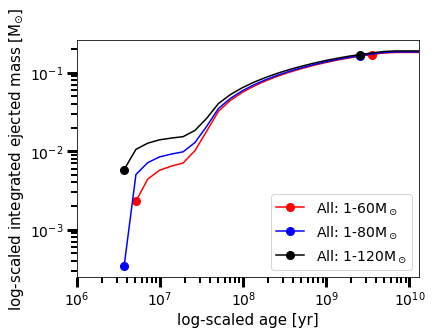

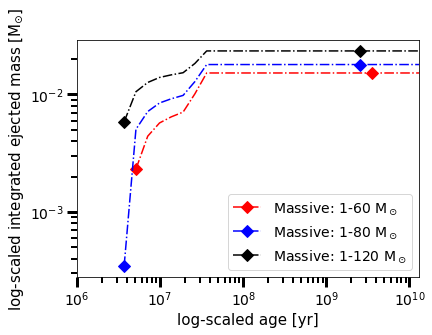

In [38]:
# Run sigma module with range 1-120,1-80,1-60 for non-rotating case at subsolar metallicity #
# See WR constraints for mass and metallicity at 
## [1] Limongi, M.,Chieffi, A.,2018,Presupernova evolu-
## tion and explosive nucleosynthesis of rotating massive stars in the
## metallicity range -3 ≤ [Fe/H] ≤ 0, Ap. JS.

s1_Z3 = s.sygma(iniZ=0.002,mgal=1.0,imf_type='salpeter',sn1a_on=False,transitionmass=8,
               table='yield_tables/WR/agb_and_massive_stars_Z_^-3C15_LC18_R_000_winds (1).txt',
                imf_yields_range=[1,80],imf_bdys=[0.1,121])

s2_Z3 = s.sygma(iniZ=0.002,mgal=1.0,imf_type='salpeter',sn1a_on=False,transitionmass=8,
                table='yield_tables/WR/agb_and_massive_stars_Z_^-3C15_LC18_R_000_winds (1).txt',
                imf_yields_range=[1,120],imf_bdys=[0.1,121]) 

s3_Z3 = s.sygma(iniZ=0.002,mgal=1.0,imf_type='salpeter',sn1a_on=False,transitionmass=8,
                table='yield_tables/WR/agb_and_massive_stars_Z_^-3C15_LC18_R_000_winds (1).txt',
                imf_yields_range=[1,60],imf_bdys=[0.1,121])

s3_Z3.plot_totmasses(fig=1,source='all',color='r',label='All: 1-60M$_\odot$')
s1_Z3.plot_totmasses(fig=1,source='all',color='blue',label='All: 1-80M$_\odot$')
s2_Z3.plot_totmasses(fig=1,source='all',label='All: 1-120M$_\odot$')
plt.legend(loc='best')
s3_Z3.plot_totmasses(fig=2,source='massive',color='red',label='Massive: 1-60 M$_\odot$')
plt.legend(loc='best')
s1_Z3.plot_totmasses(fig=2,source='massive',color='blue',label='Massive: 1-80 M$_\odot$')
s2_Z3.plot_totmasses(fig=2,source='massive',color='k',label='Massive: 1-120 M$_\odot$')
plt.legend(loc='best')

In [39]:
# Substract ejecta arrays, for the total ejecta
tot_ej_sZ3_1_120 = get_massive_star_ejecta(s2_Z3, element="all")
tot_ej_sZ3_1_80 = get_massive_star_ejecta(s1_Z3, element="all")

diff_tot_ej_sZ3 = tot_ej_sZ3_1_120 - tot_ej_sZ3_1_80
print(diff_tot_ej_sZ3)
## ========================================== ##
tot_ej_sZ3_1_120 = get_massive_star_ejecta(s2_Z3, element="all")
tot_ej_sZ3_1_60 = get_massive_star_ejecta(s3_Z3, element="all")

diff_tot_ej_sZ3_60_120 = tot_ej_sZ3_1_120 - tot_ej_sZ3_1_60
## ========================================== ##
element = "O"
el_ej_sZ3_1_120 = get_massive_star_ejecta(s2_Z3, element=element)
el_ej_sZ3_1_80 = get_massive_star_ejecta (s1_Z3,  element=element)

diff_el_sZ3_ej = el_ej_sZ3_1_120 - el_ej_sZ3_1_80

[0.         0.         0.         0.         0.         0.00549866
 0.00549866 0.00549866 0.00549866 0.00549866 0.00549866 0.00549866
 0.00549866 0.00549866 0.00549866 0.00549866 0.00549866 0.00549866
 0.00549866 0.00549866 0.00549866 0.00549866 0.00549866 0.00549866
 0.00549866 0.00549866 0.00549866 0.00549866 0.00549866 0.00549866
 0.00549866]


At t= 3693520.062657637 Mass ejected is 0.0054986576813820355 for difference in 80-120
At t= 5120360.963847775 Mass ejected is 0.008240329125777702 for difference in 60-120


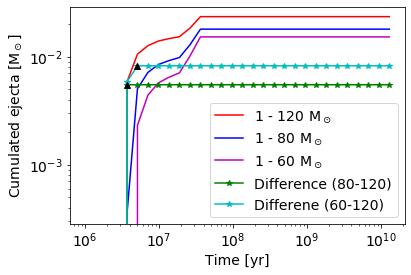

In [40]:
# Copy the time array
time_1_120_z3 = copy.deepcopy(s2_Z3.history.age)
time_1_80_z3 = copy.deepcopy(s1_Z3.history.age)
time_1_60_z3 = copy.deepcopy(s3_Z3.history.age)

# Plot total (cumulated) ejecta as a function of time
plt.plot(time_1_120_z3, tot_ej_sZ3_1_120, color="r", label="1 - 120 M$_\odot$")
plt.plot(time_1_80_z3, tot_ej_sZ3_1_80, color="b", label="1 - 80 M$_\odot$")
plt.plot(time_1_60_z3, tot_ej_sZ3_1_60, color="m", label="1 - 60 M$_\odot$")


plt.plot(time_1_80_z3, diff_tot_ej_sZ3, color="g", label="Difference (80-120)",marker='*')
plt.plot(time_1_60_z3, diff_tot_ej_sZ3_60_120, color="c", label="Differene (60-120)",marker='*')

plt.plot(time_1_80_z3[5],diff_tot_ej_sZ3[5],color='k',marker='^')
plt.plot(time_1_60_z3[6],diff_tot_ej_sZ3_60_120[6],color='k',marker='^')

# Labels
plt.xlabel("Time [yr]")
plt.ylabel("Cumulated ejecta [M$_\odot$]")
plt.yscale("log")
plt.xscale("log")
plt.legend(loc="best")

print('At t=',time_1_80_z3[5],'Mass ejected is',diff_tot_ej_sZ3[5],'for difference in 80-120')
print('At t=',time_1_60_z3[6],'Mass ejected is',diff_tot_ej_sZ3_60_120[6],'for difference in 60-120')

At t= 3693520.062657637 Mass ejected is 6.428332715325949e-06 for difference in 80-120


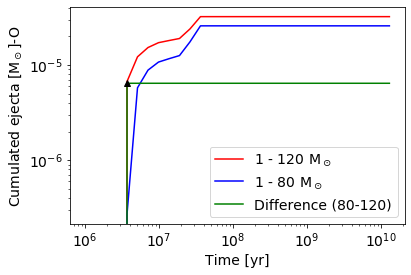

In [41]:
plt.plot(time_1_120_z3, el_ej_sZ3_1_120, color="r", label="1 - 120 M$_\odot$")
plt.plot(time_1_80_z3, el_ej_sZ3_1_80, color="b", label="1 - 80 M$_\odot$")

plt.plot(time_1_80_z3, diff_el_sZ3_ej, color="g", label="Difference (80-120)")

plt.plot(time_1_80_z3[5],diff_el_sZ3_ej[5],color='k',marker='^')

print('At t=',time_1_80_z3[5],'Mass ejected is',diff_el_sZ3_ej[5],'for difference in 80-120')

plt.xlabel("Time [yr]")
plt.ylabel("Cumulated ejecta [M$_\odot$]-"+element)
plt.yscale("log")
plt.xscale("log")
plt.legend(loc="best")

## Effects of Rotation
### Rotating ($V_{ini}$ = 150, 300 km/s) stars with masses 20-120 $M_{\odot}$ at sub-solar metallicity (z=0.002)


SYGMA run in progress..
   SYGMA run completed - Run time: 0.06s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.06s


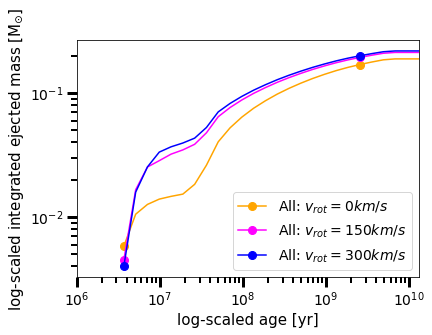

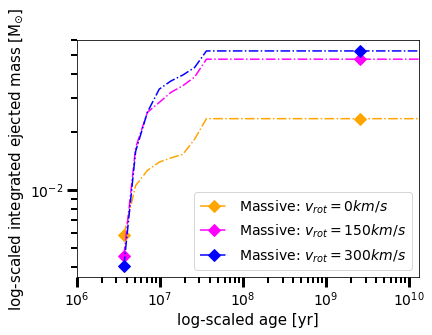

In [42]:
# Run sigma module with range 1-120,1-20, for v=150,300 km/s case at subsolar metallicity #

s_r150 = s.sygma(iniZ=0.002, mgal=1.0,transitionmass=8,sn1a_on=False,#special_timesteps=200,
            table='yield_tables/WR/agb_and_massive_stars_3C15_LC18_R_150_winds (1).txt',
            imf_bdys=[0.1,121],imf_type='salpeter',imf_yields_range=[1,120])

s_r300=s.sygma(iniZ=0.002, mgal=1.0,transitionmass=8,sn1a_on=False,#sn1a_on=False,
            table='yield_tables/LC yields/agb_and_massive_stars_C15_LC18_R_300_winds.txt',
            imf_bdys=[0.1,121],imf_type='salpeter',imf_yields_range=[1,120])


s2_Z3.plot_totmasses(fig=1,source='all',color='orange',label='All: $v_{rot}=0 km/s$')
s_r150.plot_totmasses(fig=1,source='all',color='magenta',label='All: $v_{rot}=150 km/s$')
s_r300.plot_totmasses(fig=1,source='all',color='b',label='All: $v_{rot}=300 km/s$')
plt.legend(loc='best')
s2_Z3.plot_totmasses(fig=2,source='massive',color='orange',label='Massive: $v_{rot}=0 km/s$')
s_r150.plot_totmasses(fig=2,source='massive',color='magenta',label='Massive: $v_{rot}=150 km/s$')
s_r300.plot_totmasses(fig=2,source='massive',color='b',label='Massive: $v_{rot}=300 km/s$')
plt.legend(loc='best')

At t= 36346389.10201427 Mass ejected is 0.023485859800636458 for v=0 km/s
At t= 36346389.10201427 Mass ejected is 0.04784596509656429 for v=150 km/s
At t= 36346389.10201427 Mass ejected is 0.05279839696629074 for v=300 km/s


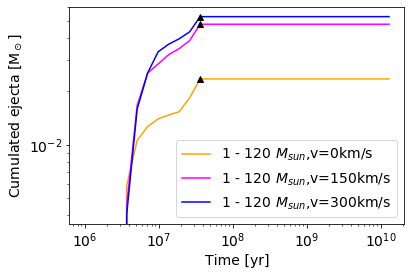

In [43]:
# Substract ejecta arrays, for the total ejecta
tot_ej_sZ3_1_120 = get_massive_star_ejecta(s2_Z3, element="all")
tot_ej_sr150_1_120 = get_massive_star_ejecta(s_r150, element="all")
tot_ej_sr300_1_120 = get_massive_star_ejecta(s_r300, element="all")
## ========================================== ##
element = "O"

el_ej_sr150_1_120 = get_massive_star_ejecta(s_r150, element=element)
el_ej_sr300_1_120 = get_massive_star_ejecta(s_r300, element=element)

## ========================================== ##
time_1_120_z3 = copy.deepcopy(s2_Z3.history.age)
time_r150_z3 = copy.deepcopy(s_r150.history.age)
time_r300_z3 = copy.deepcopy(s_r300.history.age)

# Plot total (cumulated) ejecta as a function of time
plt.plot(time_1_120_z3, tot_ej_sZ3_1_120, color="orange", label="1 - 120 $M_{sun}$,v=0km/s")
plt.plot(time_r150_z3, tot_ej_sr150_1_120, color="magenta", label="1 - 120 $M_{sun}$,v=150km/s")
plt.plot(time_r300_z3, tot_ej_sr300_1_120, color="b", label="1 - 120 $M_{sun}$,v=300km/s")

plt.plot(time_1_120_z3[12],tot_ej_sZ3_1_120[12],color='k',marker='^')
plt.plot(time_r150_z3[12],tot_ej_sr150_1_120[12],color='k',marker='^')
plt.plot(time_r300_z3[12],tot_ej_sr300_1_120[12],color='k',marker='^')

# Labels
plt.xlabel("Time [yr]")
plt.ylabel("Cumulated ejecta [M$_\odot$]")
plt.yscale("log")
plt.xscale("log")
plt.legend(loc="best")

print('At t=',time_1_120_z3[12],'Mass ejected is',tot_ej_sZ3_1_120[12],'for v=0 km/s')
print('At t=',time_r150_z3[12],'Mass ejected is',tot_ej_sr150_1_120[12],'for v=150 km/s')
print('At t=',time_r300_z3[12],'Mass ejected is',tot_ej_sr300_1_120[12],'for v=300 km/s')